# Hands-on Session 2
## Jun 7



<span style='color:orange'>Topics</span>
* Shortest paths, diameter, average path length
* connected components
<!-- * Transitivity, mutual friends -->
* Clustering coefficient
* Assortativity, degree heterogeneity
* Centrality

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# 1. Paths

Let's start with a very simple, undirected network.

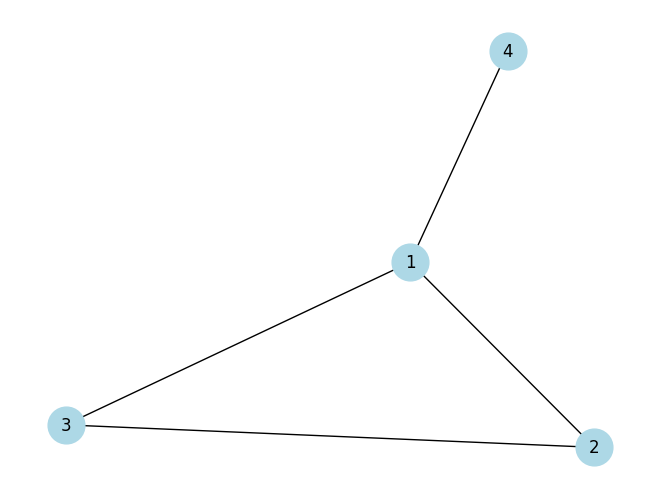

In [4]:
G = nx.Graph()

# G.add_nodes_from([1, 2, 3, 4])

G.add_edges_from([(1, 2), (2, 3), (1, 3), (1, 4)])

nx.draw(G, with_labels=True, node_color='lightblue', node_size=700)

A *path* in a network is a sequence of consecutive edges connecting two nodes. In this simple example, we can easily see that there is indeed at least one path that connects nodes 3 and 4. We can verify this with NetworkX:

In [5]:
nx.has_path(G, 3, 4)

True

There can be more than one path between two nodes. Again considering nodes 3 and 4, there are two such "simple" paths:

In [6]:
nx.all_simple_paths(G, 3, 4)

<generator object all_simple_paths at 0x7bf5742457e0>

In [7]:
list(nx.all_simple_paths(G, 3, 4))

[[3, 2, 1, 4], [3, 1, 4]]

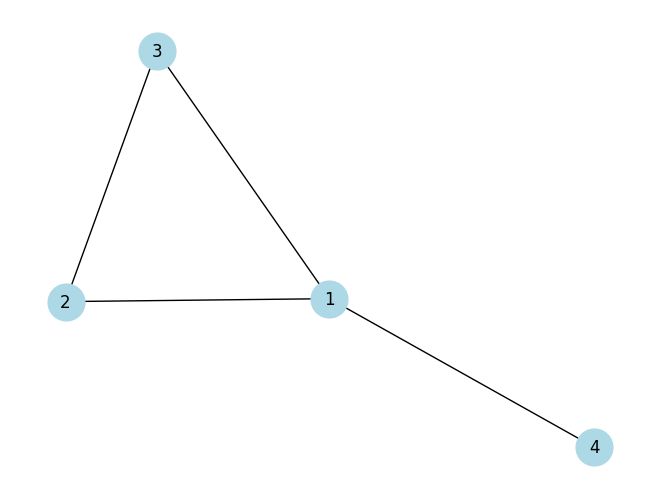

In [8]:
nx.draw(G, with_labels=True, node_color='lightblue', node_size=700)

A simple path is one without any cycles.

We are often most interested in *shortest* paths. In an unweighted network, the shortest path is the one with the fewest edges. We can see that of the two simple paths between nodes 3 and 4, one is shorter than the other. We can get this shortest path with a single NetworkX function:

In [9]:
nx.shortest_path(G, 3, 4)

[3, 1, 4]

If you only care about the path length, there's a function for that too:

In [10]:
nx.shortest_path_length(G, 3, 4)

2

Note that a path length is defined here by the number of *edges* in the path, not the number of nodes, which implies

    nx.shortest_path_length(G, u, v) == len(nx.shortest_path(G, u, v)) - 1
    
for nodes $u$ and $v$.

## Weighted shortest paths

In weighted graphs, path lengths factor in edge weights. In networkx, the undirected shortest path functions can be used for weighted graphs by passing the parameter `weight='weight'`.

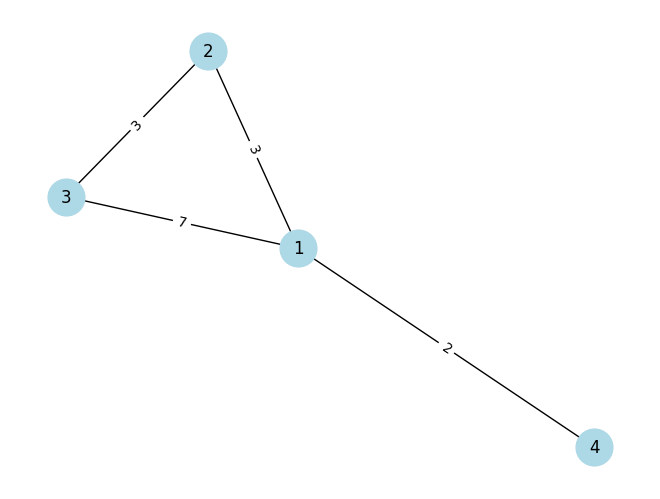

In [11]:
W = nx.Graph()
# W.add_edge(1, 2, weight=6)

W.add_weighted_edges_from([
  (1, 2, 3), (2, 3, 3), (1, 3, 7), (1, 4, 2),
])

pos = nx.spring_layout(W, seed=4)

nx.draw(W, pos=pos, with_labels=True, node_color='lightblue', node_size=700);
nx.draw_networkx_edge_labels(W, pos=pos, edge_labels=nx.get_edge_attributes(W, 'weight'));

The (weighted) shortest path between nodes `3` and `4` can be found as

In [12]:
nx.shortest_path(W, 3, 4, weight='weight')

[3, 2, 1, 4]

If you only care about the path length, there's a function for that too:

In [13]:
nx.shortest_path_length(W, 3, 4, weight='weight')

8

# Diameter and Average Path Length (APL)

The diameter of a (connected) graph is the _longest_ shortest-path length across all pairs of nodes.

Similarly, the average path length is the mean of the distribution of shortest path lengths across all pairs of nodes.

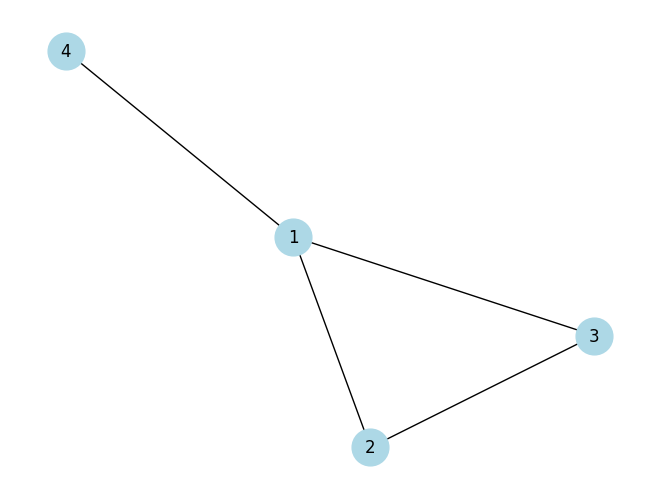

In [14]:
G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4])

G.add_edges_from([(1, 2), (2, 3), (1, 3), (1, 4)])

nx.draw(G, with_labels=True, node_color='lightblue', node_size=700)

Let's check the distribution of shortest path lengths

In [15]:
shortest_path_lengths = []
for u in G.nodes():
    for v in G.nodes():
        if u < v:  # why?
            sp_length = nx.shortest_path_length(G, u, v)
            print(f'{u} --- {v}, len={sp_length}')
            shortest_path_lengths.append(sp_length)
print(shortest_path_lengths)

1 --- 2, len=1
1 --- 3, len=1
1 --- 4, len=1
2 --- 3, len=1
2 --- 4, len=2
3 --- 4, len=2
[1, 1, 1, 1, 2, 2]


In [16]:
nx.average_shortest_path_length(G)  # 8/6

1.3333333333333333

The diameter is the longest shortest-path.

In [17]:
nx.diameter(G)

2

## Weighted variants

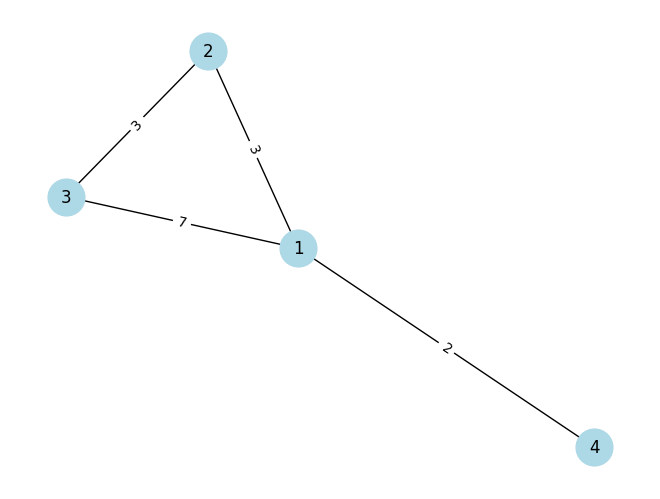

In [18]:
W = nx.Graph()
W.add_edge(1, 2, weight=6)
W.add_weighted_edges_from([
  (1, 2, 3), (2, 3, 3), (1, 3, 7), (1, 4, 2),
])

pos = nx.spring_layout(W, seed=4)

nx.draw(W, pos=pos, with_labels=True, node_color='lightblue', node_size=700);
nx.draw_networkx_edge_labels(
    W, pos=pos, edge_labels=nx.get_edge_attributes(W, 'weight')
);

Like before, pass the `weight='weight'` argument in calls to `nx.diameter` and `nx.average_shortest_path_length` to use edge-weights.

In [19]:
nx.diameter(W, weight='weight')

8

In [20]:
shortest_path_lengths = []
for u in G.nodes():
    for v in G.nodes():
        if u < v:  # why?
            sp_length = nx.shortest_path_length(W, u, v, weight='weight')
            print(f'{u} --- {v}, len={sp_length}')
            shortest_path_lengths.append(sp_length)
print(shortest_path_lengths)

1 --- 2, len=3
1 --- 3, len=6
1 --- 4, len=2
2 --- 3, len=3
2 --- 4, len=5
3 --- 4, len=8
[3, 6, 2, 3, 5, 8]


In [21]:
nx.average_shortest_path_length(W, weight='weight')

4.5

# 2. Connected components

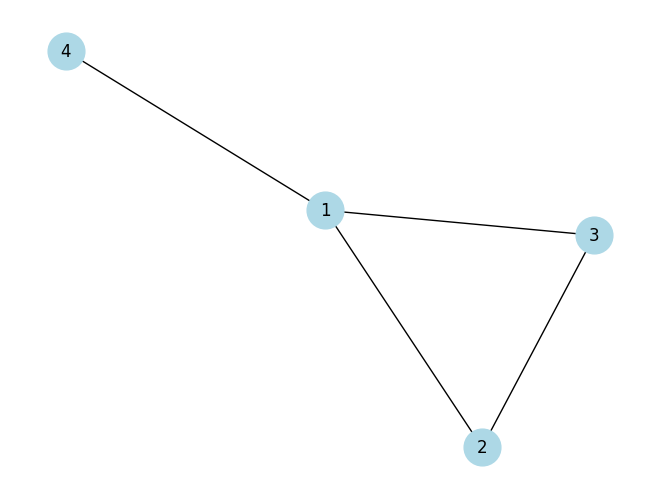

In [22]:
nx.draw(G, with_labels=True, node_color='lightblue', node_size=700)

In the simple network above, we can see that for *every* pair of nodes, we can find a path connecting them. This is the definition of a *connected* graph. We can check this property for a given graph:

In [23]:
nx.is_connected(G)

True

Not every graph is connected:

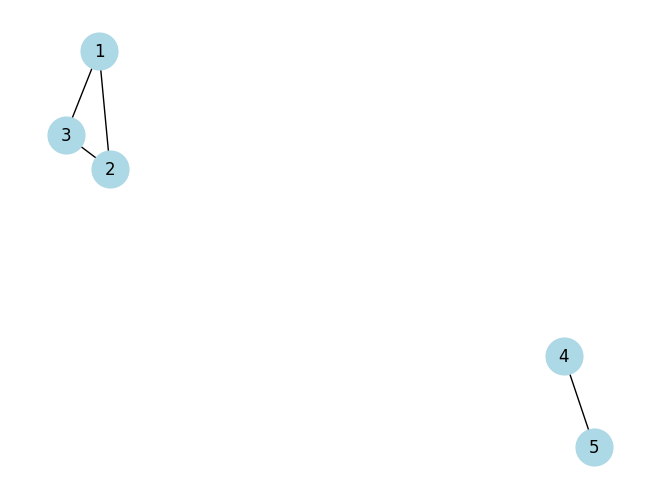

In [24]:
G = nx.Graph()

nx.add_cycle(G, (1,2,3))
G.add_edge(4,5)

nx.draw(G, with_labels=True, node_color='lightblue', node_size=700)

In [25]:
nx.is_connected(G)

False

And NetworkX will raise an error if you ask for a path between nodes where none exists:

In [26]:
nx.has_path(G, 3, 5)

False

In [27]:
nx.shortest_path(G, 3, 5)

NetworkXNoPath: No path between 3 and 5.

Visually, we can identify two connected components in our graph. Let's verify this:

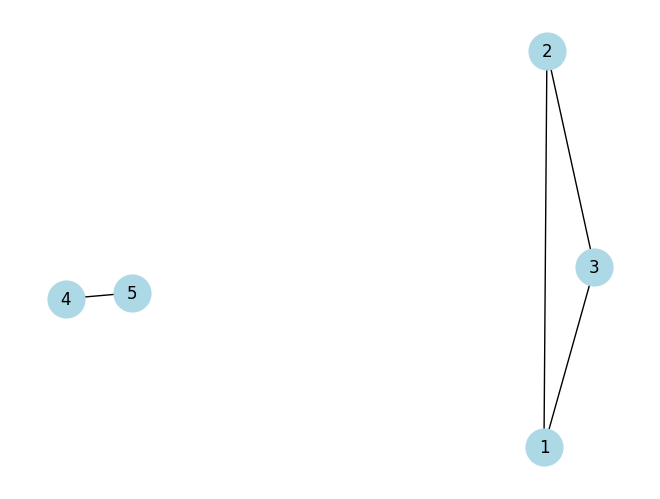

In [28]:
nx.draw(G, with_labels=True, node_color='lightblue', node_size=700)

In [29]:
nx.number_connected_components(G)

2

The `nx.connected_components()` function takes a graph and returns a list of sets of node names, one such set for each connected component. Verify that the two sets in the following list correspond to the two connected components in the drawing of the graph above:

In [30]:
nx.connected_components(G)

<generator object connected_components at 0x7bf555f67d10>

In [31]:
list(nx.connected_components(G))

[{1, 2, 3}, {4, 5}]

Similarly, we can also collect all of the size of each component in the following way:

In [32]:
component_sizes = [len(c) for c in nx.connected_components(G)]
print(component_sizes)

[3, 2]


We often care about the largest connected component, which is sometimes referred to as the *core* of the network. We can make use of Python's builtin `max` function in order to obtain the largest connected component. By default, Python's `max` function sorts things in lexicographic (i.e. alphabetical) order, which is not helpful here. We want the maximum connected component when sorted in order of their sizes, so we pass `len` as a key function:

In [33]:
max(nx.connected_components(G), key=len)

{1, 2, 3}

While it's often enough to just have the list of node names, sometimes we need the actual subgraph consisting of the largest connected component. One way to get this is to pass the list of node names to the `G.subgraph()` function:

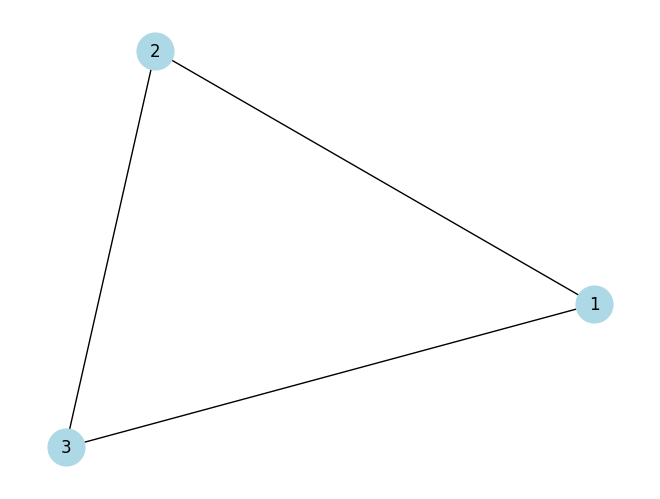

In [34]:
lcc_nodes = max(nx.connected_components(G), key=len)
lcc = G.subgraph(lcc_nodes)

nx.draw(lcc, with_labels=True, node_color='lightblue', node_size=700)

If we wanted to get a list of all connected component subgraphs, we can use list comprehension.

In [35]:
S = [G.subgraph(c) for c in nx.connected_components(G)]
S

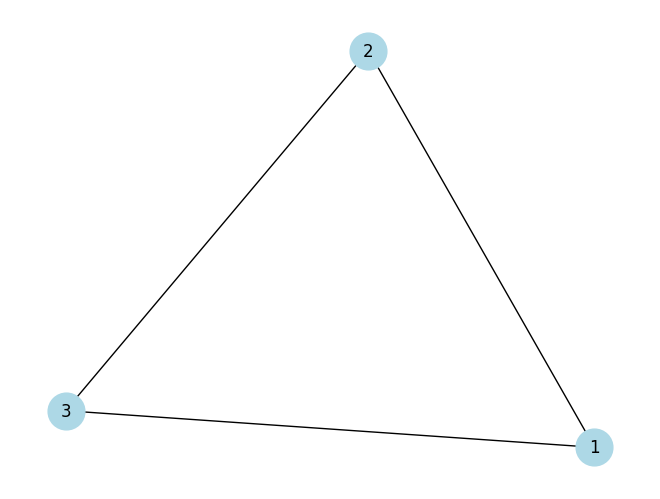

In [36]:
nx.draw(S[0], with_labels=True, node_color='lightblue', node_size=700)

In [37]:
nx.diameter(S[0])

1

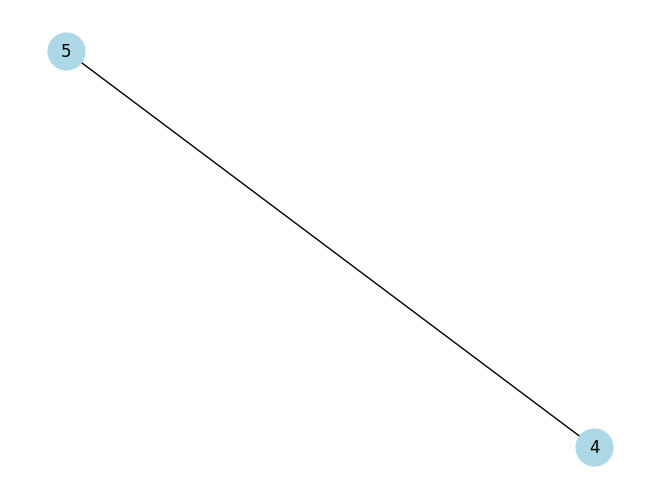

In [38]:
nx.draw(S[1], with_labels=True, node_color='lightblue', node_size=700)

# Clustering coefficients and triangles

The clustering coefficient $C(i)$ of a node $i$ is the fraction of pairs of the node's neighbors that are _connected_ to each other.
$$
C(i) = \frac{\tau(i)}{\tau_\max (i)} = \frac{\tau(i)}{\binom{k_i}{2}},
$$
where $\tau(i)$ is the number of triangles node $i$ is a part of.

Note: NetworkX defines $C(i)=$ 0 when a node $i$ has fewer than 2 neighbors.



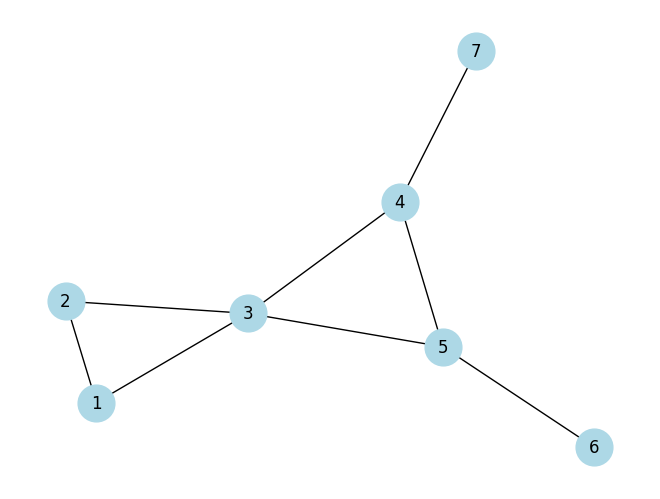

In [39]:
G = nx.Graph()
G.add_edges_from([
    (1, 2), (1, 3), (2, 3),
    (3, 4), (3, 5), (4, 5),
    (5, 6), (4, 7),
])
nx.draw(G, with_labels=True, node_color='lightblue', node_size=700)

`nx.triangles` returns a dictionary of counts of triangles each node is part of.
So `nx.triangles(G)[i]` is the same as $\tau(i)$.

In [40]:
nx.triangles(G)

{1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 0, 7: 0}

Similarly, the function `nx.clustering(G)` returns a dictionary with the clustering coefficients for each node $i$ in $G$.



In [41]:
nx.clustering(G)

{1: 1.0,
 2: 1.0,
 3: 0.3333333333333333,
 4: 0.3333333333333333,
 5: 0.3333333333333333,
 6: 0,
 7: 0}

## Average clustering

The clustering coefficient $C$ of the _network_ $G$ is the average of the clustering coefficients of the nodes.

$$
C = \frac{\sum_{i: k_i>1} C(i)}{N_{k>1}},
$$

where $N_{k>1}$ is the number of nodes with degree > 1.

`nx.average_clustering` returns the clustering coefficient of the network. Passing `count_zeros=False` excludes nodes with zero $C(i)$ in the denominator and matches with our definition.


In [42]:
print(nx.average_clustering(G, count_zeros=False))  ## 3 / 5
print(nx.average_clustering(G))  ## 3 / 7

0.6000000000000001
0.42857142857142866


# Assortativity

Assortativity measures the tendency of nodes with similar characteristics to be connected. These characteristics can be internal properties like `degree` or external attributes like `political affiliations` (categorical) and `age` (numeric).

## Degree assortativity

Also known as _degree correlation_, it measures the tendency of nodes with similar degrees to be neighbors.

In a _highly_ assortative network, high-degree nodes tend to be neighbors with other nodes with high degrees, and low-degree nodes are more frequently connected with other low-degree nodes. Example: _core-periphery_ networks.

Similarly, in a _highly_ disassortative network, connections are more prevalent between nodes of dissisimilar degrees. Example: _hub and spoke_ networks.

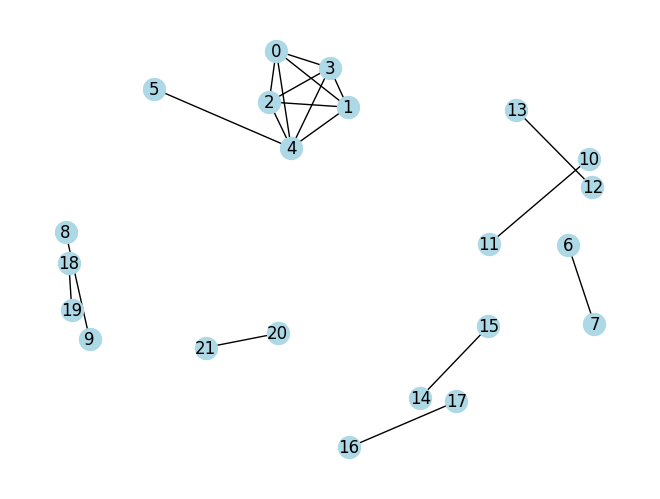

In [43]:
G = nx.complete_graph(5)

G.add_edges_from([(i, i+1) for i in range(4, 22, 2)])  # add disconnected paths

nx.draw(
    G, with_labels=True, node_color='lightblue', node_size=250,
    pos=nx.spring_layout(G, k=0.75, seed=20),
)

The degree assortativity coefficient of a network can be computed using the `nx.degree_assortativity_coefficient` function.

In [44]:
nx.degree_assortativity_coefficient(G)

0.804526748971193

Compare that with a _disassortative_ network with a negative degree assortativity coefficient.

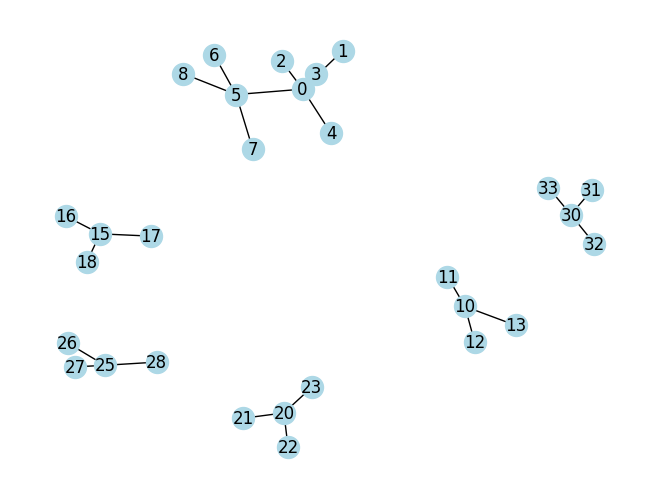

In [45]:
G = nx.Graph()

nx.add_star(G, range(6))
for i in range(1, 7):
  nx.add_star(G, range(5*i, 5*i+4))

G.add_edge(5, 7)

nx.draw(
    G, with_labels=True, node_color='lightblue', node_size=250,
    pos=nx.spring_layout(G, k=0.3, seed=20),
)

In [46]:
nx.degree_assortativity_coefficient(G)

-0.6444026340545622

# Degree heterogeneity $\kappa$

Measures the broadness/homogeneity of the degree distribution of a network.

$$
\kappa = \frac{\langle k^2 \rangle}{\langle k \rangle^2},
$$

where $\langle k \rangle$ is the average degree, and
$$
\langle k^2 \rangle = \frac{\sum_i k_i^2}{N}
$$

In a network where most nodes have similar degrees, $\kappa \approx 1$.
For a highly degree heterogeneous network $\kappa >> 1$.

Graph with 32 nodes and 56 edges


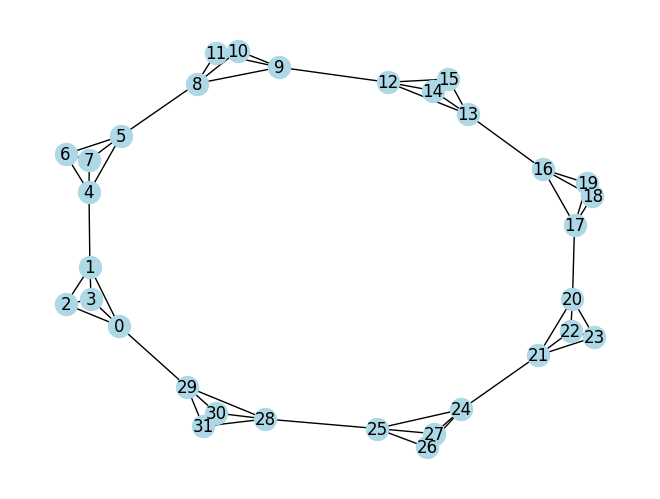

In [47]:
G = nx.ring_of_cliques(8, 4)
print(G)

nx.draw(
    G, with_labels=True, node_color='lightblue', node_size=250,
    pos=nx.spring_layout(G, seed=1),
)

In [48]:
degs = [G.degree(n) for n in G.nodes()]
kappa = np.mean([k ** 2 for k in degs])  / (np.mean(degs) ** 2)

kappa

1.0204081632653061

Now, let's look at an example of a network with high $\kappa$: US flight is a flight network of US airports.

In [49]:
%%capture out
%%bash
wget -O us-flights.edges.gz https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/raw/master/datasets/openflights/openflights_usa.edges.gz
gunzip -f us-flights.edges.gz

Graph with 546 nodes and 2781 edges


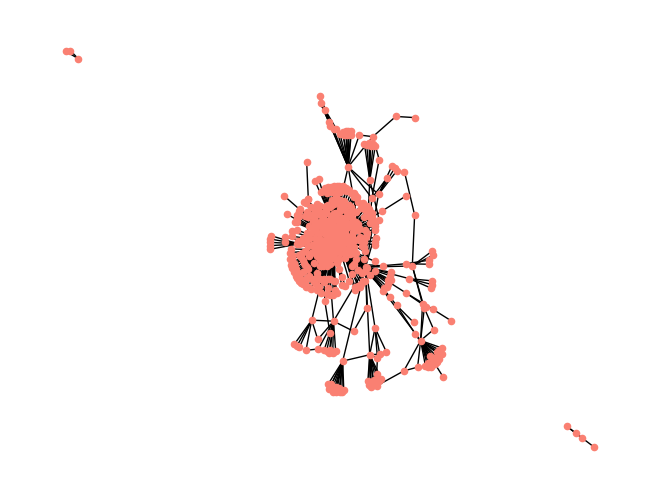

In [50]:
G = nx.read_edgelist('us-flights.edges')
print(G)
nx.draw(G, with_labels=False, node_color='salmon', node_size=20,)

In [51]:
degs = [G.degree[n] for n in G.nodes()]
kappa = np.mean([k ** 2 for k in degs])  / (np.mean(degs) ** 2)

kappa

5.347494770144302

# Breakout 1

The [`socfb-Northwestern25`](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/blob/master/datasets/socfb-Northwestern25/socfb-Northwestern25.edges.gz) network in the book’s Github repository is a snapshot of Northwestern University’s Facebook network. The nodes are anonymous users and the links are friend relationships. Load this network into a NetworkX graph in order to answer the following questions. Be sure to use the proper graph class for an undirected, unweighted network.

In [52]:
%%capture out
%%bash
wget -O socfb-Northwestern25.edges.gz https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/raw/master/datasets/socfb-Northwestern25/socfb-Northwestern25.edges.gz
gunzip -f socfb-Northwestern25.edges.gz

In [53]:
! head  socfb-Northwestern25.edges

# Undirected
21 1
34 1
55 1
119 1
129 1
179 1
189 1
194 1
203 1


### Load the [network](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/blob/master/datasets/socfb-Northwestern25/socfb-Northwestern25.edges.gz) using the `networkx.read_edgelist()` function.

In [184]:
G = nx.read_edgelist('socfb-Northwestern25.edges')

### Q1. How many nodes and links are in this network?

In [185]:
edges = len(G.edges)
nodes = len(G)
print(f'The number of nodes: {nodes}')
print(f'The number of links: {edges}')

The number of nodes: 10567
The number of links: 488337


### Q2. Is the network connected? If not, count the number of components.

In [186]:
ncc = nx.number_connected_components(G)
if ncc == 1:
  print('This is not a connected network!')
else:
  print(f'This network has {ncc} components.')

This network has 15 components.


### Q3. What are the sizes of the *two* largest components?

In [187]:
sorted([len(i) for i in list(nx.connected_components(G))], reverse=True)[:2]

[10537, 4]

### Q4. What is the average clustering coefficient for this network?

In [188]:
nx.average_clustering(G, count_zeros=False)

0.2486754740579565

### Q5. Is this network assortative or disassortative?

In [84]:
dac = nx.degree_assortativity_coefficient(G)
if dac > 0:
  print(f'It is assortative with {dac} degree assortativity coefficient.')
else:
  print(f'It is disassortative with {dac} degree assortativity coefficient.')

It is assortative with 0.03444129080711028 degree assortativity coefficient.


# Centrality and Hubs

Often when looking at a network, we want to find the most "important" nodes, for some definition of important. The most basic measure of centrality is the *degree*, or number of links attached to a node.

Let's look at the Enron executive email graph:

In [85]:
%%capture out
! wget -O enron.edges https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/ia-enron-only/ia-enron-only.edges

Graph with 143 nodes and 623 edges


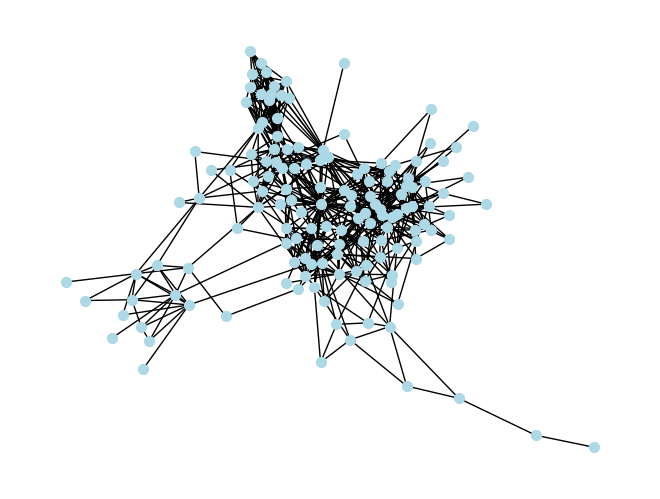

In [86]:
G = nx.read_edgelist('enron.edges', nodetype=int)
print(G)
nx.draw(G, with_labels=False, node_color='lightblue', node_size=50,)

<!-- ### Caveat: by default, `nx.read_edgelist` assumes node names are strings

Edge lists are a simple, plain text format for storing graphs. Since this simple file format doesn't contain information about data types, all node names are assumed to be strings by default. When the node names are given by integers, as they are in this example, we should specify the `nodetype=int` keyword argument to avoid confusion with the node names. -->


### Aside: the `max` function

We're going to make use of Python's built-in `max` function in order to find the node with the highest degree.

First, let us recall what the `max` function does. At its most basic, the `max` function returns the "greatest" item in a sequence:

In [87]:
max([1, 2, 3, 4, 5])

5

But the "greatest" item is not always obvious:

In [88]:
max(['apple', 'grape', 'carrot'])

'grape'

Why is `grape` greater than the other options? Because the default sort for strings is lexicographical (basically alphabetical) order. If we don't want this default ordering, we can specify a *key* function, which tells Python how to compare the items:

In [89]:
max(['apple', 'grape', 'carrot'], key=len)

'carrot'

Now `carrot` is the greatest element, because we're comparing the items by their length.

### Finding the node with max degree

We can apply the `max` function to get the maximum node according to some criterion. In our case, we want to compare the nodes by their degree:

In [90]:
highest_degree_node = max(G.nodes, key=G.degree)
highest_degree_node

105

In [91]:
G.degree(highest_degree_node)

42

In [92]:
betweenness = nx.centrality.betweenness_centrality(G)
betweenness

{17: 0.11088210445609471,
 1: 0.0003340978665026238,
 72: 0.05833907970763193,
 3: 0.0006787989625523211,
 2: 0.0037576779169544673,
 19: 0.006984623939369158,
 20: 0.007284328058569526,
 27: 0.0018837796140877582,
 29: 0.001006133922375674,
 31: 0.027382413977465946,
 48: 0.09673142009207425,
 65: 0.01031965845801162,
 67: 0.019201963242365488,
 69: 0.010145969253844544,
 71: 0.00039806044732766275,
 132: 0.04775121164257601,
 136: 0.01173876185899926,
 4: 0.0012489175342937358,
 28: 0.0013102886582118957,
 54: 0.0,
 22: 0.05846852533268458,
 5: 0.0,
 9: 0.010460021309673101,
 6: 0.0022068940050096633,
 13: 0.003449550878294903,
 16: 0.005298508843627979,
 26: 0.009720604361990017,
 47: 0.028023273711078975,
 49: 0.0014988074227315087,
 64: 0.011408916322947925,
 66: 0.005613645637378239,
 105: 0.19400604344556296,
 11: 0.003336611317429915,
 7: 0.0011139541749508963,
 12: 0.0006665350834047873,
 24: 0.0033788239600489284,
 74: 0.05162886109956878,
 75: 0.018855939162481756,
 112: 0.0

In [93]:
highest_betweenness_node = max(G.nodes, key=betweenness.get)
highest_betweenness_node

105

In [94]:
betweenness[highest_betweenness_node]

0.19400604344556296

In [95]:
betweenness.get(-1)

Note that the following will throw an error:

In [96]:
max(G.nodes, key=betweenness)

TypeError: 'dict' object is not callable

This is because we need to provide a function to the `key` argument, but `betweenness` is a dict. To get around this, we use the dict's `get` method.

## 2. Centrality distributions

We've found the most central node in the network, but often we want to summarize information about the centrality of all nodes. For example, in addition to the maximum degree, we often want the mean and median degree in a network.

The first step in summarizing this information is to get a sequence of all of the centrality values in the graph. We don't care about the node names anymore, we just want a sequence of numbers. We can start with the example of degree:

In [98]:
degree_sequence = [G.degree(n) for n in G.nodes]
degree_sequence[: 20]

[30, 2, 17, 12, 13, 16, 17, 10, 11, 18, 20, 15, 16, 16, 11, 19, 17, 11, 10, 7]

To get the mean and median of this sequence, we can use Numpy.

In [99]:
print('Mean degree:', np.mean(degree_sequence))
print('Median degree:', np.median(degree_sequence))

Mean degree: 8.713286713286713
Median degree: 8.0


For other measures of centrality, which are calculated for the whole network at once and return a dict, we can use the dict's `.values()`.

In [100]:
betweenness = nx.centrality.betweenness_centrality(G)
print(betweenness)

{17: 0.11088210445609471, 1: 0.0003340978665026238, 72: 0.05833907970763193, 3: 0.0006787989625523211, 2: 0.0037576779169544673, 19: 0.006984623939369158, 20: 0.007284328058569526, 27: 0.0018837796140877582, 29: 0.001006133922375674, 31: 0.027382413977465946, 48: 0.09673142009207425, 65: 0.01031965845801162, 67: 0.019201963242365488, 69: 0.010145969253844544, 71: 0.00039806044732766275, 132: 0.04775121164257601, 136: 0.01173876185899926, 4: 0.0012489175342937358, 28: 0.0013102886582118957, 54: 0.0, 22: 0.05846852533268458, 5: 0.0, 9: 0.010460021309673101, 6: 0.0022068940050096633, 13: 0.003449550878294903, 16: 0.005298508843627979, 26: 0.009720604361990017, 47: 0.028023273711078975, 49: 0.0014988074227315087, 64: 0.011408916322947925, 66: 0.005613645637378239, 105: 0.19400604344556296, 11: 0.003336611317429915, 7: 0.0011139541749508963, 12: 0.0006665350834047873, 24: 0.0033788239600489284, 74: 0.05162886109956878, 75: 0.018855939162481756, 112: 0.026793162429957114, 8: 0.0, 124: 0.0479

In [101]:
betweenness_sequence = list(betweenness.values())

print('Mean betweenness:', np.mean(betweenness_sequence))
print('Median betweenness:', np.median(betweenness_sequence))

Mean betweenness: 0.013950388838012456
Median betweenness: 0.0037492834763570323


# Plotting distributions

### Discrete histograms

We can graphically represent the sequence of centrality values by using a *histogram*. In its basic form, a histogram plots the degree values on the x-axis, and the number of nodes having that degree on the y-axis. To do this counting, we can make use of Python's `collections.Counter`.

In [102]:
degree_sequence[: 10]

[30, 2, 17, 12, 13, 16, 17, 10, 11, 18]

In [103]:
from collections import Counter

degree_counts = Counter(degree_sequence)
degree_counts

Counter({30: 1,
         2: 16,
         17: 5,
         12: 5,
         13: 3,
         16: 5,
         10: 9,
         11: 10,
         18: 3,
         20: 1,
         15: 3,
         19: 2,
         7: 9,
         14: 6,
         9: 16,
         42: 1,
         8: 6,
         5: 8,
         6: 7,
         1: 6,
         4: 11,
         23: 1,
         3: 9})

The `Counter` object returned is like a dict, pairing the item counted with the number of times it showed up in the sequence.

On this basic histogram plot, we want an x-value for every integer between the minimum and maximum degree in the sequence, inclusive. Note that `degree_counts.keys()` gives us every distinct value seen in the degree sequence. Also note that we need the +1 in the `range` below because we want to include the right endpoint.

In [104]:
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())

plot_x = list(range(min_degree, max_degree + 1))
print(plot_x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


Our y-values are then the number of times we counted each x-value in the degree sequence. We can make use of the `.get` method with a default value in order to count 0 for degree values that don't show up in the sequence. For example, notice that 32 does not show up in `degree_counts` above, so `degree_counts.get(32, 0)` will give us 0.

In [105]:
plot_y = [degree_counts.get(x, 0) for x in plot_x]
print(plot_y)

[6, 16, 9, 11, 8, 7, 9, 6, 16, 9, 10, 5, 3, 6, 3, 5, 5, 3, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


To do the plotting, we use Matplotlib's `pyplot` module.

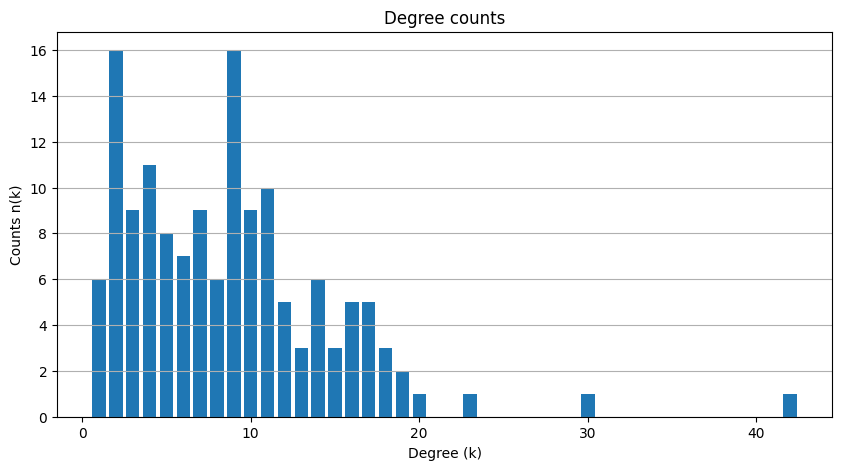

In [106]:
fig, ax = plt.subplots(figsize=(10, 5));
ax.grid(axis='y');
ax.bar(
    plot_x, plot_y,
);

ax.set_title('Degree counts');
ax.set_xlabel('Degree (k)');
ax.set_ylabel('Counts n(k)');

### Binned histograms

When there are more x-values than you can comfortably display, or when your centrality measure is not discrete, as in the case of betweenness centrality, we can make use of histogram "binning." This just defines a sequence of disjoint intervals called *bins*, and counts the number of values that fall into each such bin. In the simplest of cases, we can just tell Matplotlib's `hist` function how many bins we want and it will do the binning for us.

In [107]:
betweenness_sequence[: 10]

[0.11088210445609471,
 0.0003340978665026238,
 0.05833907970763193,
 0.0006787989625523211,
 0.0037576779169544673,
 0.006984623939369158,
 0.007284328058569526,
 0.0018837796140877582,
 0.001006133922375674,
 0.027382413977465946]

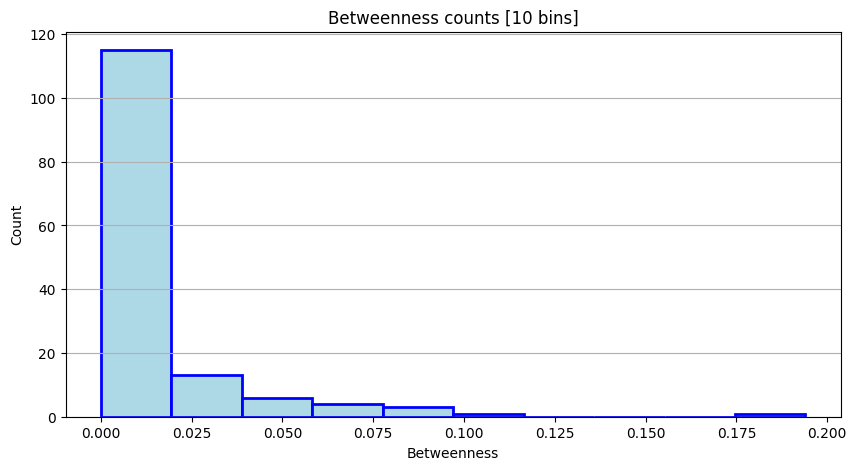

In [108]:
fig, ax = plt.subplots(figsize=(10, 5))
num_bins = 10

ax.grid(axis='y');

counts, bins, patches = ax.hist(
    betweenness_sequence, bins=num_bins,
    facecolor='lightblue', edgecolor='blue', linewidth=2,
);

ax.set_title(f'Betweenness counts [{num_bins} bins]');
ax.set_xlabel('Betweenness');
ax.set_ylabel('Count');

We can investigate the returned `bins` and `counts` if we want:

In [109]:
counts

array([115.,  13.,   6.,   4.,   3.,   1.,   0.,   0.,   0.,   1.])

In [110]:
bins

array([0.        , 0.0194006 , 0.03880121, 0.05820181, 0.07760242,
       0.09700302, 0.11640363, 0.13580423, 0.15520483, 0.17460544,
       0.19400604])

Let's calculate width of each bin.

In [111]:
[(bins[i+1] - bins[i]) for i in range(len(bins)-1)]

[0.019400604344556295,
 0.019400604344556295,
 0.019400604344556295,
 0.019400604344556295,
 0.019400604344556288,
 0.019400604344556302,
 0.019400604344556302,
 0.019400604344556288,
 0.019400604344556288,
 0.019400604344556316]

In this case, each bin has the same width of `0.0194`. For distributions with a broad range spanning multiple orders of magnitude, it often makes more sense to use bins of different widths.

### Logarithmic Binning

Note for binning distributions that hold only integer values (eg degree), it is useful to enforce the bin boundaries be integers themselves.
This can be done by casting the bin boundaries to be integers using `.astype(int)`

In [112]:
degrees = [G.degree(n) for n in G.nodes()]
print(degrees)

[30, 2, 17, 12, 13, 16, 17, 10, 11, 18, 20, 15, 16, 16, 11, 19, 17, 11, 10, 7, 14, 2, 12, 9, 11, 10, 11, 16, 10, 13, 11, 42, 8, 5, 6, 8, 18, 15, 9, 2, 17, 11, 14, 7, 18, 9, 8, 6, 14, 14, 7, 14, 17, 10, 9, 16, 11, 8, 9, 1, 9, 4, 6, 9, 5, 8, 19, 4, 9, 14, 6, 6, 7, 23, 12, 9, 10, 12, 3, 10, 5, 3, 7, 5, 2, 3, 5, 3, 7, 13, 4, 4, 7, 5, 9, 3, 2, 10, 12, 8, 10, 2, 11, 3, 1, 2, 9, 9, 9, 7, 11, 4, 15, 3, 4, 4, 9, 5, 9, 7, 1, 9, 2, 4, 2, 3, 2, 1, 4, 6, 4, 3, 2, 6, 2, 2, 1, 2, 2, 1, 5, 4, 2]


We want to bin the `degree counts` into `num_bins` logarithmic sized bins. The `geomspace` function in Numpy is useful for this purpose.

In [113]:
## log bins
num_bins = 10

bins = (
    np.geomspace(
        start=min(degrees),
        stop=max(degrees),
        num=num_bins,
    )
    .astype(int)  # turns the bin boundaries into int
)
bins

array([ 1,  1,  2,  3,  5,  7, 12, 18, 27, 42])

In [114]:
## linear bins
num_bins = 10

(
    np.linspace(
        start=min(degrees),
        stop=max(degrees),
        num=num_bins,
    )
    .astype(int)  # turns the bin boundaries into int
)

array([ 1,  5, 10, 14, 19, 23, 28, 32, 37, 42])

The bin widths are no longer uniform!

In [115]:
[(bins[i+1] - bins[i]) for i in range(len(bins)-1)]

[0, 1, 1, 2, 2, 5, 6, 9, 15]

In [116]:
bins

array([ 1,  1,  2,  3,  5,  7, 12, 18, 27, 42])

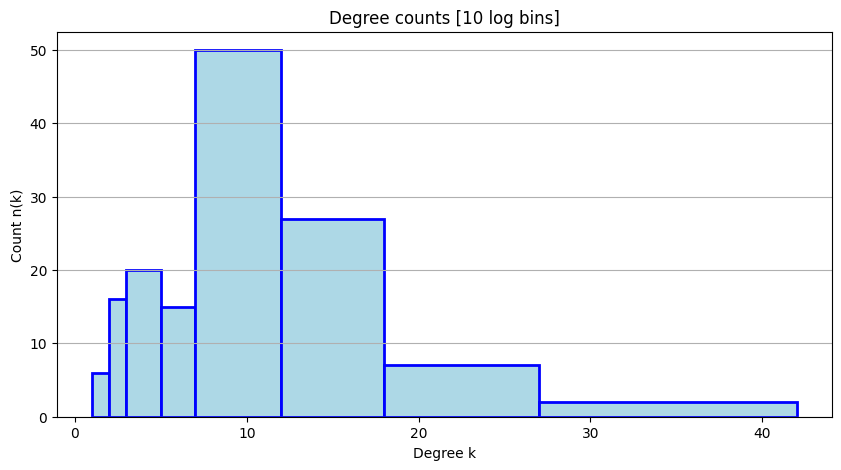

In [117]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.grid(axis='y');

counts, bins, patches = ax.hist(
    degrees, bins=bins,
    facecolor='lightblue', edgecolor='blue', linewidth=2,
);

ax.set_title(f'Degree counts [{len(bins)} log bins]');
ax.set_xlabel('Degree k');
ax.set_ylabel('Count n(k)');

Plotting the two distributions side-by-side

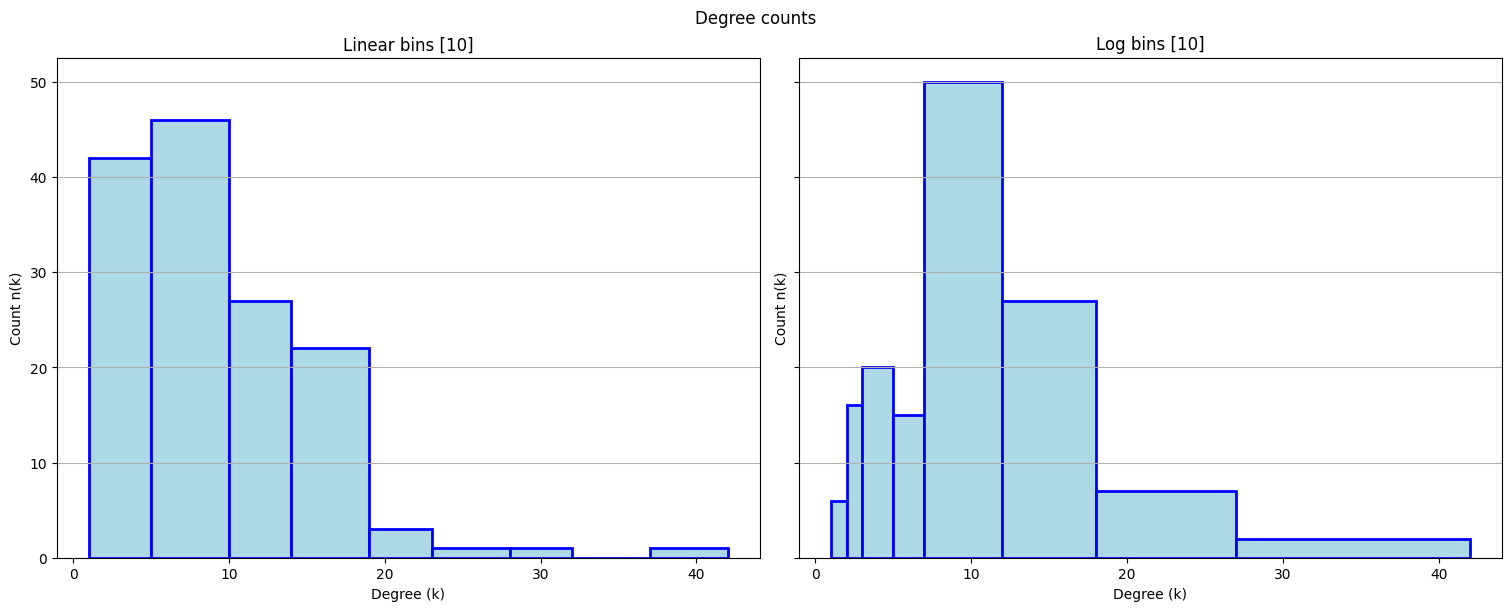

In [118]:
fig, (ax_left, ax_right) = plt.subplots(
    figsize=(15, 6), ncols=2, sharey=True, layout='constrained'
)

fig.suptitle('Degree counts');

num_bins = 10

## left histogram w/ linear bins

left_bins = np.linspace(
    start=min(degrees),
    stop=max(degrees),
    num=num_bins,
).astype(int)

ax_left.grid(axis='y');
ax_left.hist(
    degrees, bins=left_bins,
    facecolor='lightblue', edgecolor='blue', linewidth=2,
);

ax_left.set_title(f'Linear bins [{num_bins}]');
ax_left.set_xlabel('Degree (k)');
ax_left.set_ylabel('Count n(k)');

## right histogram w/ log bins
right_bins = np.geomspace(
    start=min(degrees),
    stop=max(degrees),
    num=num_bins,
).astype(int)

ax_right.grid(axis='y');
ax_right.hist(
    degrees, bins=right_bins,
    facecolor='lightblue', edgecolor='blue', linewidth=2,
);

ax_right.set_title(f'Log bins [{num_bins}]');
ax_right.set_xlabel('Degree (k)');
ax_right.set_ylabel('Count n(k)');

## Normalized histograms (density)

We often want to generate probability _density_ functions, where the area under the plot sums to 1.

These can be generated from histogram count plots, where the count $c_b$ in each bin $b$ is divided by the product of the following terms.

1. the total sum of counts ($\sum_b c_b$) across all bins, **and**
2. the *width* of the bin $b$.

Note that bin widths are not constant for logaritmic bins.
Matplotlib can normalize the counts automatically if we pass the `density=True` argument inside the `plt.hist` function.

### aside: probability density function

For a random variable $X$, $f_X$ is a probability density function if $$Prob[a < X < b] = \int_a^b f_X dx$$, i.e., the probability that the function holds a value in range $(a, b)$.

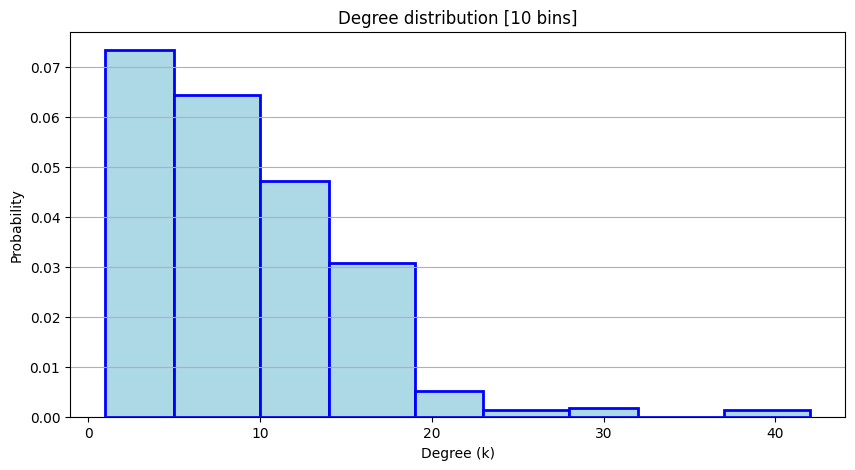

In [122]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.grid(axis='y');

num_bins = 10
bins = np.linspace(
    start=min(degrees),
    stop=max(degrees),
    num=num_bins,
).astype(int)

counts, bins, patches = ax.hist(
    degrees, bins=bins,
    density=True,
    facecolor='lightblue', edgecolor='blue', linewidth=2,
);

ax.set_title(f'Degree distribution [{len(bins)} bins]');
ax.set_xlabel('Degree (k)');
ax.set_ylabel('Probability');

In [123]:
bins

array([ 1.,  5., 10., 14., 19., 23., 28., 32., 37., 42.])

Larger networks often have a wide range of node degrees. In those cases, it is better to use `log` scales for both X and Y axes.

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


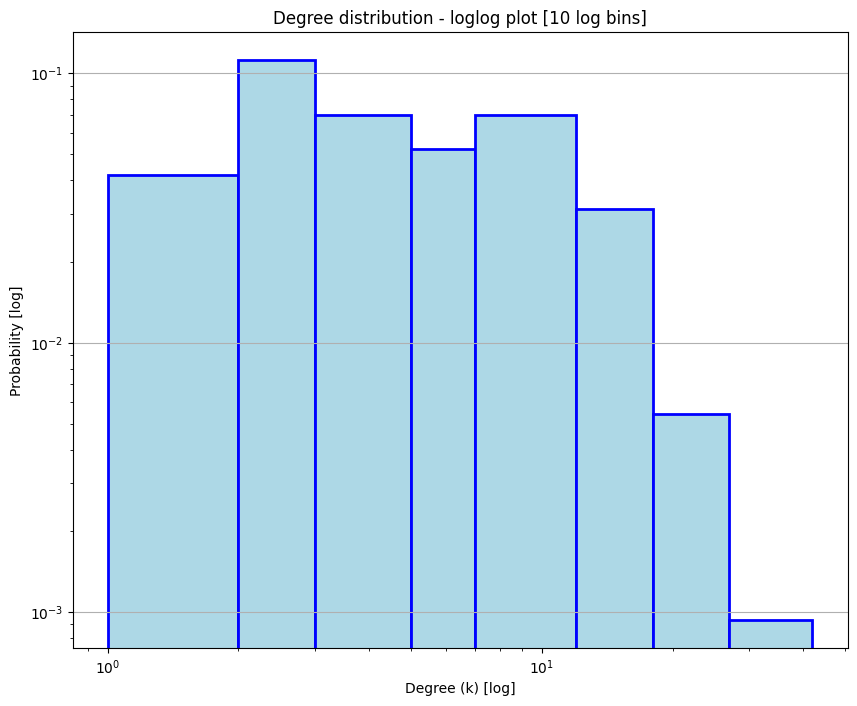

In [121]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.grid(axis='y');

num_bins = 10
bins = np.geomspace(
    start=min(degrees),
    stop=max(degrees),
    num=num_bins,
).astype(int)

counts, bins, patches = ax.hist(
    degrees, bins=bins, density=True,
    facecolor='lightblue', edgecolor='blue', linewidth=2,
);

ax.set_xscale('log');
ax.set_yscale('log');

ax.set_title(f'Degree distribution - loglog plot [{len(bins)} log bins]');
ax.set_xlabel('Degree (k) [log]');
ax.set_ylabel('Probability [log]');

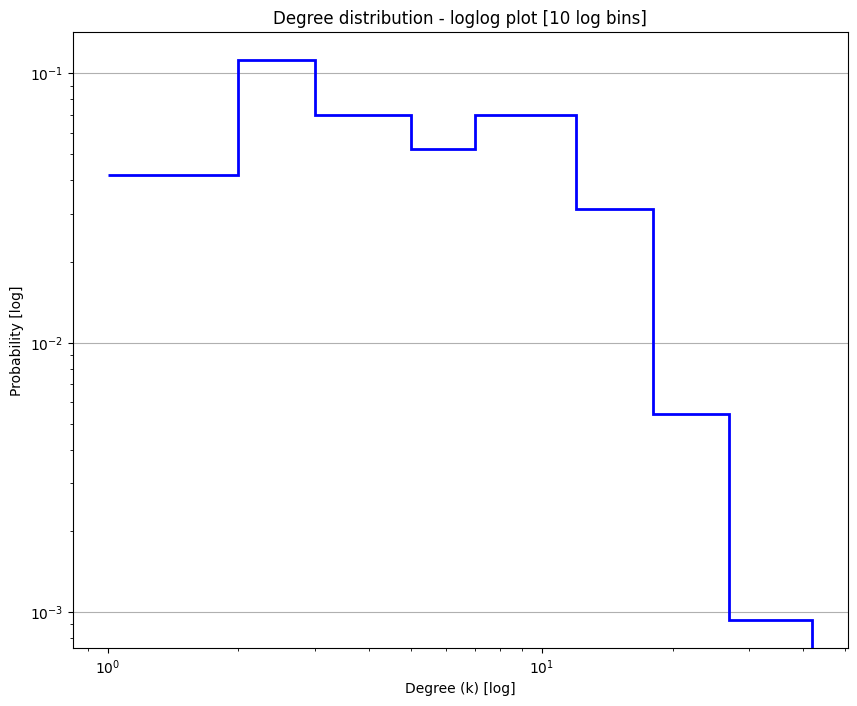

In [124]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.grid(axis='y');

num_bins = 10
bins = np.geomspace(
    start=min(degrees),
    stop=max(degrees),
    num=num_bins,
).astype(int)

counts, bins, patches = ax.hist(
    degrees, bins=bins, density=True,
    histtype='step',  # only draw the bin boundaries
    edgecolor='blue', linewidth=2,
);

ax.set_xscale('log');
ax.set_yscale('log');

ax.set_title(f'Degree distribution - loglog plot [{len(bins)} log bins]');
ax.set_xlabel('Degree (k) [log]');
ax.set_ylabel('Probability [log]');

# Breakout 2

We will compare properties of two real-world directed networks `wikipedia` and `twitter` from the book's Github [repo](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/tree/master/datasets).

Run the cell below to download the edgelists of the two networks `wikipedia.edges` and `twitter.edges`.

In [125]:
%%capture out
%%bash
wget -O wikipedia.edges.gz https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/raw/master/datasets/enwiki_math/enwiki_math.edges.gz
gunzip -f wikipedia.edges.gz

wget -O twitter.edges.gz https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/raw/master/datasets/icwsm_polarization/retweet-digraph.edges.gz
gunzip -f twitter.edges.gz

Inspect the two edgelists

In [126]:
! head wikipedia.edges

8354790 21573 {}
8354790 20120951 {}
8354790 18902 {}
8354790 6095467 {}
8354790 1234374 {}
151925 7921 {}
151925 22213 {}
151925 11692574 {}
151925 3114930 {}
151925 185427 {}


In [127]:
! head twitter.edges

n1 n15743 1
n1 n5410 1
n15743 n7114 6
n15743 n7578 1
n15743 n6213 1
n15743 n754 1
n15743 n17736 1
n2 n16701 1
n4 n979 1
n7 n3000 1


## Read the two _directed_ networks.

In [132]:
Gw = nx.read_edgelist('wikipedia.edges', create_using=nx.DiGraph())
Gt = nx.read_edgelist('twitter.edges', data=(('weight', float),), create_using=nx.DiGraph())

## Q1. Compute and compare the following quantities for the two networks.


### (a) What proportion of nodes have out-degree 100 or greater?
hint: ratio of number of nodes having degree no less than 100 divided by the total number of nodes.

In [178]:
out_degree_w = Gw.out_degree()
c = Counter(dict(out_degree_w).values())
prop = round(sum(v for k, v in c.items() if k >= 100) / sum(c.values()), 4)
print(f'For Wikipedia network: {prop}')

out_degree_t = Gt.out_degree()
c = Counter(dict(out_degree_t).values())
prop = round(sum(v for k, v in c.items() if k >= 100) / sum(c.values()), 4)
print(f'For Twitter network: {prop}')

For Wikipedia network: 0.0104
For Twitter network: 0.0036


### (b) Degree heterogeneity parameter $\kappa$ for *total* degree, i.e., the sum of in and out-degrees of nodes.

In [208]:
degs = [Gw.in_degree(n) + Gw.out_degree(n) for n in Gw.nodes()]
kappa = round(np.mean([k ** 2 for k in degs])  / (np.mean(degs) ** 2), 4)
print(f'The kappa for Wikipedia network is {kappa}')

degs = [Gt.in_degree(n) + Gt.out_degree(n) for n in Gt.nodes()]
kappa = round(np.mean([k ** 2 for k in degs])  / (np.mean(degs) ** 2), 4)
print(f'The kappa for Twitter network is {kappa}')


The kappa for Wikipedia network is 13.2233
The kappa for Twitter network is 11.3788


### (c) Plot the in-degree distributions in log-log scale for the two networks. Assume number of bins = 30.

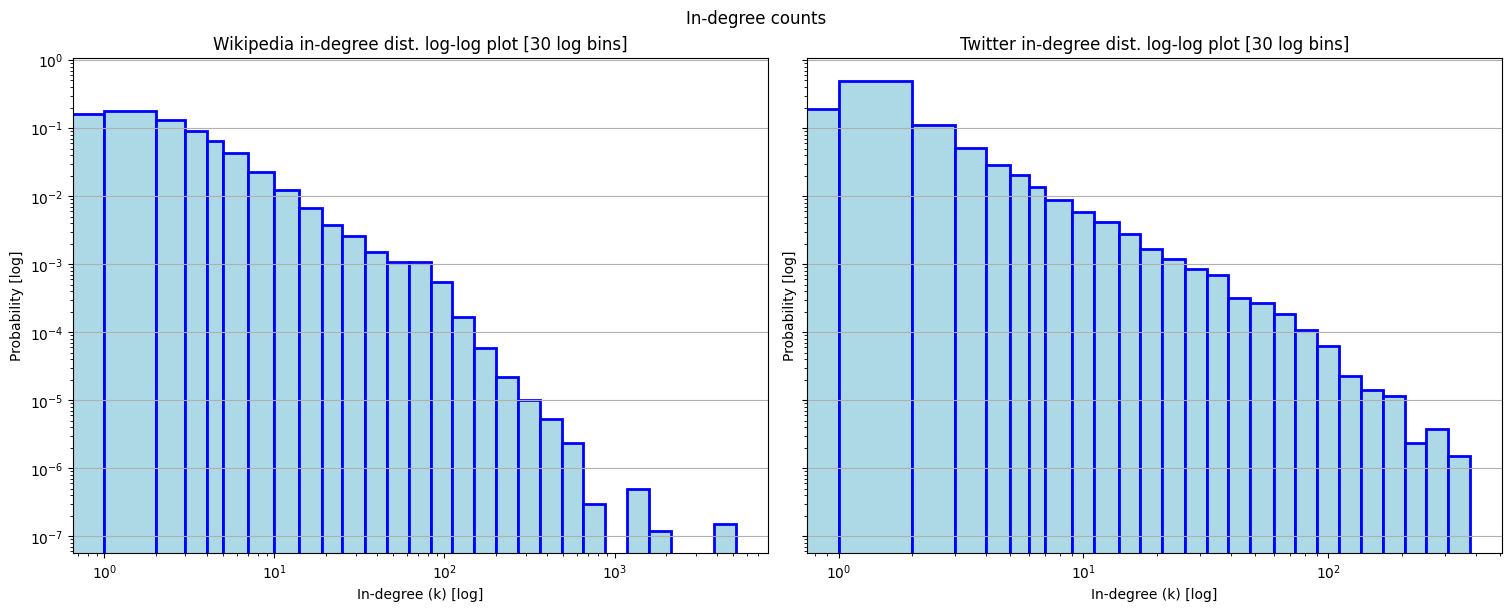

In [207]:
w_in_degree = [Gw.in_degree(n, weight='weight') for n in Gw.nodes()]
t_in_degree = [Gt.in_degree(n, weight='weight') for n in Gt.nodes()]

fig, (ax_left, ax_right) = plt.subplots(
    figsize=(15, 6), ncols=2, sharey=True, layout='constrained'
)

fig.suptitle('In-degree counts');

num_bins = 30

## Wikipedia
left_bins = np.geomspace(
    start=min(w_in_degree) + 1,
    stop=max(w_in_degree),
    num=num_bins,
).astype(int)

left_bins = np.insert(left_bins, 0, 0)

ax_left.grid(axis='y');
ax_left.hist(
    w_in_degree, bins=left_bins, density=True,
    facecolor='lightblue', edgecolor='blue', linewidth=2,
);

ax_left.set_xscale('log')
ax_left.set_yscale('log')

ax_left.set_title(f'Wikipedia in-degree dist. log-log plot [{num_bins} log bins]');
ax_left.set_xlabel('In-degree (k) [log]');
ax_left.set_ylabel('Probability [log]');

## Twitter
right_bins = np.geomspace(
    start=min(t_in_degree) + 1,
    stop=max(t_in_degree),
    num=num_bins,
).astype(int)

right_bins = np.insert(right_bins, 0, 0)

ax_right.grid(axis='y');
ax_right.hist(
    t_in_degree, bins=right_bins, density=True,
    facecolor='lightblue', edgecolor='blue', linewidth=2,
);

ax_right.set_xscale('log')
ax_right.set_yscale('log')

ax_right.set_title(f'Twitter in-degree dist. log-log plot [{num_bins} log bins]');
ax_right.set_xlabel('In-degree (k) [log]');
ax_right.set_ylabel('Probability [log]');

### (d) Convert the two networks into undirected using `nx.to_undirected`. Report the average clustering coefficients for the two networks.

In [189]:
Gw_undirected = nx.to_undirected(Gw)
w_ac = nx.average_clustering(Gw_undirected, count_zeros=False)
print(f'Average clustering for Wikipedia network: {w_ac}')

Gt_undirected = nx.to_undirected(Gt)
t_ac = nx.average_clustering(Gt_undirected, count_zeros=False)
print(f'Average clustering for Twitter network: {t_ac}')

Average clustering for Wikipedia network: 0.3722542069224466
Average clustering for Twitter network: 0.15724129076734158


## Q2. "In a connected network, the diameter is always greater than or equal to the average shortest path length". Explain in 1-2 sentences whether the above statement is True or False.

The diameter represents the maximum shortest path length, while the average shortest path length is an average of all shortest paths, making it inherently less than or equal to the maximum.


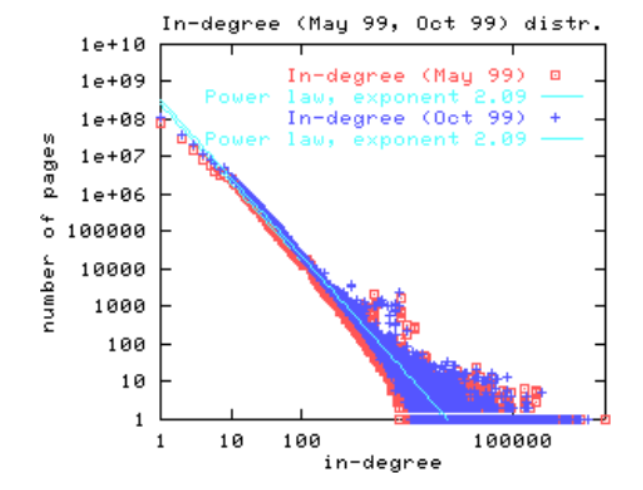

## Q3. For the following questions, consider the in-degree distribution from a study of 200 million Web pages and 1.5 billion links between them (Broder et al., 2000). It is a log-log plot of the number of pages (y-axis) with a given number of in-links (x-axis):

### (a) Approximately how many pages have only 1 page linking to them in May 1999?

In [200]:
10 ** 8

100000000

### (b) Approximately how many pages have only 10 pages linking to them in May 1999?

In [201]:
10 ** 6

1000000

### (c) Approximately how many pages have only 100 pages linking to them in May 1999?

In [202]:
10 ** 4

10000

----- End of notebook

# Assignment submission link: https://forms.gle/RtNt5hHuD7eQXF2X6